# Import Libraries

In [1]:
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())

Model execution started at:Thu Apr 16 15:06:18 2020


In [2]:
import src
import src.dataset.dataset as dst
import src.dataset.dataloader as dl
import src.utils.utils as utils
import src.train.train_model as train
import src.visualization.plotdata as plotdata
import src.preprocessing.preprochelper as preprochelper
from src.utils import cifar_mean,cifar_std
from src.dataset.tinyimagenethelper import TinyImagenetHelper
import torchvision

%config IPCompleter.greedy=True
%reload_ext autoreload

In [3]:
%autoreload 2  # Autoreload all modules

In [4]:
def printgpuinfo():
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
      print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
      print('and then re-execute this cell.')
    else:
      print(gpu_info)
    
printgpuinfo()

Thu Apr 16 15:06:19 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64       Driver Version: 440.64       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1070    Off  | 00000000:01:00.0  On |                  N/A |
| N/A   82C    P0    39W /  N/A |   1059MiB /  8117MiB |      3%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [5]:
def showsysteminfo():
    from psutil import virtual_memory
    ram_gb = virtual_memory().total / 1e9
    ram_gb_avail = virtual_memory().available / 1e9
    ram_gb_used = virtual_memory().active / 1e9
    print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
    print('Your runtime has {:.1f} gigabytes of free RAM\n'.format(ram_gb_avail))
    print('Your runtime has {:.1f} gigabytes of used RAM\n'.format(ram_gb_used))    
showsysteminfo()

Your runtime has 16.7 gigabytes of available RAM

Your runtime has 9.5 gigabytes of free RAM

Your runtime has 10.3 gigabytes of used RAM



In [6]:
import torch
print(torch.__version__)

1.4.0


100%|██████████| 200/200 [00:00<00:00, 2851.66it/s]
10000it [00:00, 775616.99it/s]

File: tiny-imagenet-200.zip already downloaded.
File: tiny-imagenet-200 already extracted.
Starting data loading
Finished data loading, in 0.08584117889404297 seconds
CUDA Available? True
512



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping 

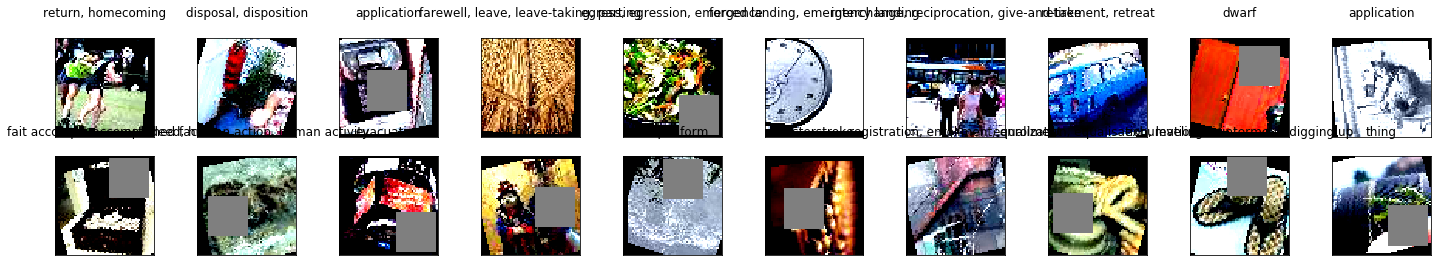

In [8]:
batch_size = 512
helper = TinyImagenetHelper()

path = helper.download_dataset(folder_path="data")
dict = helper.get_id_dictionary(path=path)
values, classes = helper.get_class_to_id_dict(id_dict=dict, path=path)

train_data, train_label, test_data, test_label = helper.get_train_test_labels_data(dict, path)
# calculated mean and std dev values for tiny imagenet takes lot of RAM so not calculating every time
# mean = [0.48043722, 0.44820285, 0.39760238]
# stddev = [0.27698976, 0.26908714, 0.2821603]
# mean, std = utils.Utils.calculate_mean_std_deviation(train_data, test_data)

# mean_timgnet = [0.48043722, 0.44820285, 0.39760238]
# std_timgnet = [0.27698976, 0.26908714, 0.2821603]
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225] 
# batch_size = 64
# compose_train, compose_test = preprochelper.PreprocHelper.getalbumentationstraintesttransforms(mean,std)

train_transforms, test_transforms = preprochelper.PreprocHelper.getpytorchtransforms(mean, std)

ds = dst.Dataset()
# train_dataset = ds.gettraindataset(train_transforms)
# test_dataset = ds.gettestdataset(test_transforms)

train_dataset = ds.get_tiny_imagenet_train_dataset(train_image_data=train_data, train_image_labels=train_label,
                                                   train_transforms=train_transforms)

test_dataset = ds.get_tiny_imagenet_test_dataset(test_image_labels=test_label, test_image_data=test_data,
                                                 test_transforms=test_transforms)

dataloader = dl.Dataloader(traindataset=train_dataset, testdataset=test_dataset, batch_size=batch_size)
train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

# specify the image classes
# classes = ds.getclassesinCIFAR10dataset()
data_iterator = iter(train_loader)
plotdata.PlotData.showImagesfromdataset(data_iterator, classes=classes)

In [9]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

cnn_model = torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)
train_model = train.TrainModel()
train_model.showmodelsummary(cnn_model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]           9,408
       BatchNorm2d-2           [-1, 64, 16, 16]             128
              ReLU-3           [-1, 64, 16, 16]               0
         MaxPool2d-4             [-1, 64, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]          36,864
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
            Conv2d-8             [-1, 64, 8, 8]          36,864
       BatchNorm2d-9             [-1, 64, 8, 8]             128
             ReLU-10             [-1, 64, 8, 8]               0
       BasicBlock-11             [-1, 64, 8, 8]               0
           Conv2d-12             [-1, 64, 8, 8]          36,864
      BatchNorm2d-13             [-1, 64, 8, 8]             128
             ReLU-14             [-1, 6

In [10]:
epochs = 25

In [11]:
from torch.optim.lr_scheduler import LambdaLR
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=0, nesterov=True)
lambda1 = lambda epoch: (epoch * 0.4)
scheduler = LambdaLR(optimizer, lr_lambda=[lambda1])

In [12]:
lr_data = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

for epoch in range(1, epochs+1):
    print("EPOCH:", epoch)
    train_model.train(cnn_model, device, train_loader, optimizer, 1)
    t_acc_epoch = train_model.test(model=cnn_model, device=device, test_loader=test_loader, class_correct=class_correct,
                                   class_total=class_total, epoch=epoch, lr_data=lr_data)
#     scheduler.step(t_acc_epoch)
    scheduler.step()
    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 1


/home/abhijit/.virtualenvs/dl4cv/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Loss=5.532236099243164 Batch_id=150 Accuracy=0.31: 100%|██████████| 151/151 [00:47<00:00,  3.21it/s] 



Test set: Average loss: 0.0106, Accuracy: 322/33000 (0.98%)

Validation accuracy increased (0.000000 --> 0.975758).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

Learning rate = 0.004  for epoch:  2
EPOCH: 2


Loss=4.798068523406982 Batch_id=150 Accuracy=2.13: 100%|██████████| 151/151 [01:31<00:00,  1.66it/s] 
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0151, Accuracy: 312/33000 (0.95%)

Learning rate = 0.008  for epoch:  3
EPOCH: 3


Loss=4.250743389129639 Batch_id=150 Accuracy=6.71: 100%|██████████| 151/151 [01:40<00:00,  1.50it/s] 



Test set: Average loss: 0.0172, Accuracy: 750/33000 (2.27%)

Validation accuracy increased (0.975758 --> 2.272727).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

Learning rate = 0.012000000000000002  for epoch:  4
EPOCH: 4


Loss=3.83193302154541 Batch_id=150 Accuracy=11.20: 100%|██████████| 151/151 [01:38<00:00,  1.54it/s]  



Test set: Average loss: 0.0186, Accuracy: 1071/33000 (3.25%)

Validation accuracy increased (2.272727 --> 3.245455).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

Learning rate = 0.016  for epoch:  5
EPOCH: 5


Loss=3.6913888454437256 Batch_id=150 Accuracy=16.16: 100%|██████████| 151/151 [01:38<00:00,  1.54it/s]



Test set: Average loss: 0.0199, Accuracy: 1443/33000 (4.37%)

Validation accuracy increased (3.245455 --> 4.372727).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

Learning rate = 0.02  for epoch:  6
EPOCH: 6


Loss=3.4317092895507812 Batch_id=150 Accuracy=20.30: 100%|██████████| 151/151 [01:40<00:00,  1.51it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0207, Accuracy: 1425/33000 (4.32%)

Learning rate = 0.024000000000000004  for epoch:  7
EPOCH: 7


Loss=3.298724889755249 Batch_id=150 Accuracy=23.49: 100%|██████████| 151/151 [01:40<00:00,  1.51it/s] 



Test set: Average loss: 0.0212, Accuracy: 1732/33000 (5.25%)

Validation accuracy increased (4.372727 --> 5.248485).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

Learning rate = 0.028000000000000004  for epoch:  8
EPOCH: 8


Loss=3.4408202171325684 Batch_id=150 Accuracy=26.08: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]



Test set: Average loss: 0.0217, Accuracy: 1822/33000 (5.52%)

Validation accuracy increased (5.248485 --> 5.521212).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

Learning rate = 0.032  for epoch:  9
EPOCH: 9


Loss=3.2399048805236816 Batch_id=150 Accuracy=28.42: 100%|██████████| 151/151 [01:42<00:00,  1.47it/s]



Test set: Average loss: 0.0223, Accuracy: 2084/33000 (6.32%)

Validation accuracy increased (5.521212 --> 6.315152).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

Learning rate = 0.036000000000000004  for epoch:  10
EPOCH: 10


Loss=3.0348610877990723 Batch_id=150 Accuracy=30.55: 100%|██████████| 151/151 [01:36<00:00,  1.57it/s]



Test set: Average loss: 0.0218, Accuracy: 2221/33000 (6.73%)

Validation accuracy increased (6.315152 --> 6.730303).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

Learning rate = 0.04  for epoch:  11
EPOCH: 11


Loss=2.8403215408325195 Batch_id=150 Accuracy=32.43: 100%|██████████| 151/151 [01:36<00:00,  1.57it/s]



Test set: Average loss: 0.0227, Accuracy: 2327/33000 (7.05%)

Validation accuracy increased (6.730303 --> 7.051515).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

Learning rate = 0.044000000000000004  for epoch:  12
EPOCH: 12


Loss=2.828875780105591 Batch_id=150 Accuracy=34.22: 100%|██████████| 151/151 [01:38<00:00,  1.54it/s] 
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0229, Accuracy: 2281/33000 (6.91%)

Learning rate = 0.04800000000000001  for epoch:  13
EPOCH: 13


Loss=2.5187253952026367 Batch_id=150 Accuracy=35.97: 100%|██████████| 151/151 [01:44<00:00,  1.44it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0230, Accuracy: 2252/33000 (6.82%)

Learning rate = 0.052000000000000005  for epoch:  14
EPOCH: 14


Loss=2.266094923019409 Batch_id=150 Accuracy=37.62: 100%|██████████| 151/151 [01:39<00:00,  1.52it/s] 



Test set: Average loss: 0.0231, Accuracy: 2640/33000 (8.00%)

Validation accuracy increased (7.051515 --> 8.000000).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

Learning rate = 0.05600000000000001  for epoch:  15
EPOCH: 15


Loss=2.4008476734161377 Batch_id=150 Accuracy=39.19: 100%|██████████| 151/151 [01:37<00:00,  1.54it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0241, Accuracy: 2439/33000 (7.39%)

Learning rate = 0.06  for epoch:  16
EPOCH: 16


Loss=2.659256935119629 Batch_id=150 Accuracy=40.60: 100%|██████████| 151/151 [01:41<00:00,  1.49it/s] 



Test set: Average loss: 0.0237, Accuracy: 2659/33000 (8.06%)

Validation accuracy increased (8.000000 --> 8.057576).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

Learning rate = 0.064  for epoch:  17
EPOCH: 17


Loss=2.498957872390747 Batch_id=150 Accuracy=42.22: 100%|██████████| 151/151 [01:41<00:00,  1.50it/s] 
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0237, Accuracy: 2488/33000 (7.54%)

Learning rate = 0.068  for epoch:  18
EPOCH: 18


Loss=2.1725776195526123 Batch_id=150 Accuracy=43.89: 100%|██████████| 151/151 [01:39<00:00,  1.51it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0235, Accuracy: 2592/33000 (7.85%)

Learning rate = 0.07200000000000001  for epoch:  19
EPOCH: 19


Loss=2.3064911365509033 Batch_id=150 Accuracy=45.20: 100%|██████████| 151/151 [01:40<00:00,  1.50it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0241, Accuracy: 2488/33000 (7.54%)

Learning rate = 0.07600000000000001  for epoch:  20
EPOCH: 20


Loss=2.108863353729248 Batch_id=150 Accuracy=46.61: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s] 
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0239, Accuracy: 2594/33000 (7.86%)

Learning rate = 0.08  for epoch:  21
EPOCH: 21


Loss=2.015448808670044 Batch_id=150 Accuracy=48.28: 100%|██████████| 151/151 [01:39<00:00,  1.52it/s] 



Test set: Average loss: 0.0240, Accuracy: 2938/33000 (8.90%)

Validation accuracy increased (8.057576 --> 8.903030).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

Learning rate = 0.084  for epoch:  22
EPOCH: 22


Loss=1.870477557182312 Batch_id=150 Accuracy=49.71: 100%|██████████| 151/151 [01:39<00:00,  1.52it/s] 
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0241, Accuracy: 2771/33000 (8.40%)

Learning rate = 0.08800000000000001  for epoch:  23
EPOCH: 23


Loss=2.0321035385131836 Batch_id=150 Accuracy=50.87: 100%|██████████| 151/151 [01:42<00:00,  1.47it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0245, Accuracy: 2906/33000 (8.81%)

Learning rate = 0.09200000000000001  for epoch:  24
EPOCH: 24


Loss=1.9758845567703247 Batch_id=150 Accuracy=52.85: 100%|██████████| 151/151 [01:38<00:00,  1.53it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0252, Accuracy: 2631/33000 (7.97%)

Learning rate = 0.09600000000000002  for epoch:  25
EPOCH: 25


Loss=1.662787675857544 Batch_id=150 Accuracy=54.17: 100%|██████████| 151/151 [01:32<00:00,  1.63it/s] 



Test set: Average loss: 0.0253, Accuracy: 2908/33000 (8.81%)

Learning rate = 0.1  for epoch:  26


In [13]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
utils.Utils.savemodel(model=cnn_model,epoch=epochs,path="savedmodels/learningratefinder.pt",optimizer_state_dict=optimizer.state_dict
                      ,train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses,lr_data=lr_data,class_correct=class_correct,class_total=class_total)

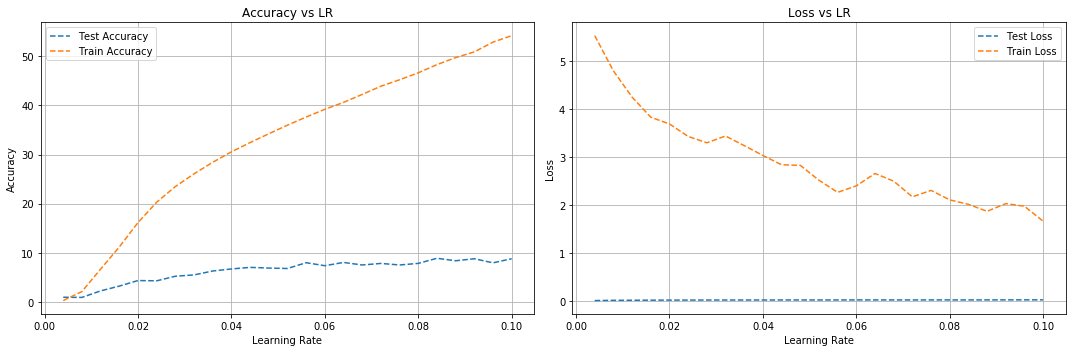

In [14]:
plotdata.PlotData.plotlrrangetestgraph(lr_data,test_acc,train_acc,test_losses,train_losses)

In [20]:
import src
import src.dataset.dataset as dst
import src.dataset.dataloader as dl
import src.utils.utils as utils
import src.train.train_model as train
import src.visualization.plotdata as plotdata
import src.preprocessing.preprochelper as preprochelper
from src.utils import cifar_mean,cifar_std
from src.dataset.tinyimagenethelper import TinyImagenetHelper
import torchvision
from src.train.trainhelper import TrainHelper

%config IPCompleter.greedy=True
%reload_ext autoreload

In [21]:
# lr_max = round(0.04935,5)
lr_max = round(0.08,5)
print("lrmax = {}".format(lr_max))
lr_min = round(lr_max / 13,5)
print("lrmin = {}".format(lr_min))
epochs = 50
maxlrepoch = 10

lrmax = 0.08
lrmin = 0.00615


100%|██████████| 200/200 [00:00<00:00, 3107.87it/s]
10000it [00:00, 968348.34it/s]

File: tiny-imagenet-200.zip already downloaded.
File: tiny-imagenet-200 already extracted.
Starting data loading
Finished data loading, in 0.07771968841552734 seconds
CUDA Available? True
512



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping 

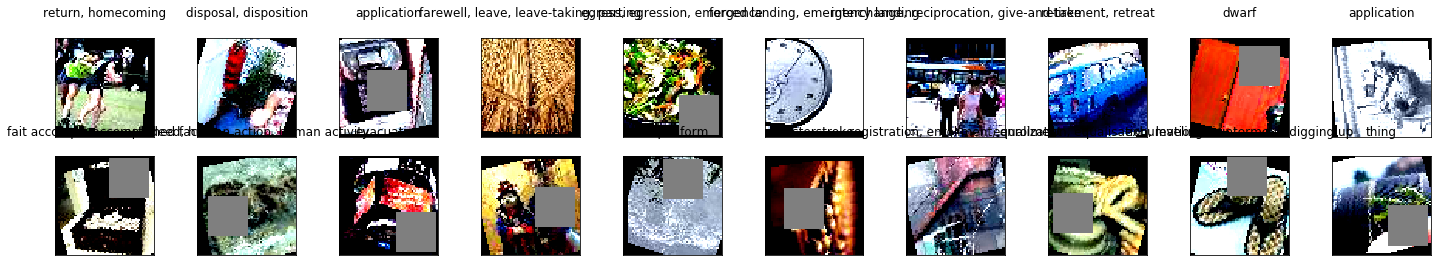

In [22]:
batch_size = 512
helper = TinyImagenetHelper()

path = helper.download_dataset(folder_path="data")
dict = helper.get_id_dictionary(path=path)
values, classes = helper.get_class_to_id_dict(id_dict=dict, path=path)

train_data, train_label, test_data, test_label = helper.get_train_test_labels_data(dict, path)
# calculated mean and std dev values for tiny imagenet takes lot of RAM so not calculating every time
# mean = [0.48043722, 0.44820285, 0.39760238]
# stddev = [0.27698976, 0.26908714, 0.2821603]
# mean, std = utils.Utils.calculate_mean_std_deviation(train_data, test_data)

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225] 
# batch_size = 64
# compose_train, compose_test = preprochelper.PreprocHelper.getalbumentationstraintesttransforms(mean,std)
train_transforms, test_transforms = preprochelper.PreprocHelper.getpytorchtransforms(mean, std)

ds = dst.Dataset()
# train_dataset = ds.gettraindataset(train_transforms)
# test_dataset = ds.gettestdataset(test_transforms)

train_dataset = ds.get_tiny_imagenet_train_dataset(train_image_data=train_data, train_image_labels=train_label,
                                                   train_transforms=train_transforms)

test_dataset = ds.get_tiny_imagenet_test_dataset(test_image_labels=test_label, test_image_data=test_data,
                                                 test_transforms=test_transforms)

dataloader = dl.Dataloader(traindataset=train_dataset, testdataset=test_dataset, batch_size=batch_size)
train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

# specify the image classes
# classes = ds.getclassesinCIFAR10dataset()
data_iterator = iter(train_loader)
plotdata.PlotData.showImagesfromdataset(data_iterator, classes=classes)

In [23]:
import torch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

cnn_model = torchvision.models.resnet18(pretrained=False, num_classes=200).cuda(device)
train_model = train.TrainModel()

In [24]:
from torch.optim.lr_scheduler import LambdaLR
optimizer = utils.Utils.createoptimizer(cnn_model, lr=1, momentum=0.9, weight_decay=0.003, nesterov=True)
lambda1 = TrainHelper.cyclical_lr(maxlrepoch=maxlrepoch, epochs=epochs, minlr=lr_min, maxlr=lr_max)
scheduler = LambdaLR(optimizer, lr_lambda=[lambda1])

In [25]:
lr_data = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

for epoch in range(0, epochs):
    print("EPOCH:", epoch)
    
    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch)  # print LR for different epochs
        lr_data.append(param_groups['lr'])
    
    train_model.train(cnn_model, device, train_loader, optimizer, 1)
    t_acc_epoch = train_model.test(model=cnn_model, device=device, test_loader=test_loader, class_correct=class_correct,
                                   class_total=class_total, epoch=epoch, lr_data=lr_data)
    scheduler.step()    

  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 0
Learning rate = 0.00615  for epoch:  0


Loss=4.6245341300964355 Batch_id=150 Accuracy=2.52: 100%|██████████| 151/151 [00:51<00:00,  2.95it/s]



Test set: Average loss: 0.0154, Accuracy: 447/33000 (1.35%)

Validation accuracy increased (0.000000 --> 1.354545).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 1
Learning rate = 0.014355555555555555  for epoch:  1


Loss=4.2123308181762695 Batch_id=150 Accuracy=8.67: 100%|██████████| 151/151 [01:27<00:00,  1.73it/s]



Test set: Average loss: 0.0172, Accuracy: 910/33000 (2.76%)

Validation accuracy increased (1.354545 --> 2.757576).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 2
Learning rate = 0.02256111111111111  for epoch:  2


Loss=3.7650537490844727 Batch_id=150 Accuracy=14.72: 100%|██████████| 151/151 [01:33<00:00,  1.62it/s]



Test set: Average loss: 0.0178, Accuracy: 1255/33000 (3.80%)

Validation accuracy increased (2.757576 --> 3.803030).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 3
Learning rate = 0.030766666666666668  for epoch:  3


Loss=3.5146079063415527 Batch_id=150 Accuracy=19.47: 100%|██████████| 151/151 [01:34<00:00,  1.59it/s]



Test set: Average loss: 0.0173, Accuracy: 1498/33000 (4.54%)

Validation accuracy increased (3.803030 --> 4.539394).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 4
Learning rate = 0.03897222222222223  for epoch:  4


Loss=3.2552337646484375 Batch_id=150 Accuracy=22.85: 100%|██████████| 151/151 [01:35<00:00,  1.59it/s]



Test set: Average loss: 0.0171, Accuracy: 1754/33000 (5.32%)

Validation accuracy increased (4.539394 --> 5.315152).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 5
Learning rate = 0.047177777777777784  for epoch:  5


Loss=3.192286491394043 Batch_id=150 Accuracy=24.88: 100%|██████████| 151/151 [01:33<00:00,  1.62it/s] 



Test set: Average loss: 0.0163, Accuracy: 1909/33000 (5.78%)

Validation accuracy increased (5.315152 --> 5.784848).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 6
Learning rate = 0.05538333333333334  for epoch:  6


Loss=3.211930513381958 Batch_id=150 Accuracy=26.75: 100%|██████████| 151/151 [01:33<00:00,  1.62it/s] 
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0163, Accuracy: 1675/33000 (5.08%)

EPOCH: 7
Learning rate = 0.06358888888888889  for epoch:  7


Loss=3.016866683959961 Batch_id=150 Accuracy=28.16: 100%|██████████| 151/151 [01:41<00:00,  1.49it/s] 



Test set: Average loss: 0.0156, Accuracy: 1986/33000 (6.02%)

Validation accuracy increased (5.784848 --> 6.018182).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 8
Learning rate = 0.07179444444444445  for epoch:  8


Loss=3.162271499633789 Batch_id=150 Accuracy=28.96: 100%|██████████| 151/151 [01:34<00:00,  1.59it/s] 
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0158, Accuracy: 1608/33000 (4.87%)

EPOCH: 9
Learning rate = 0.08  for epoch:  9


Loss=3.04243540763855 Batch_id=150 Accuracy=29.17: 100%|██████████| 151/151 [01:35<00:00,  1.58it/s]  
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0159, Accuracy: 1624/33000 (4.92%)

EPOCH: 10
Learning rate = 0.07815375000000001  for epoch:  10


Loss=2.9874651432037354 Batch_id=150 Accuracy=30.38: 100%|██████████| 151/151 [01:34<00:00,  1.60it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0159, Accuracy: 1941/33000 (5.88%)

EPOCH: 11
Learning rate = 0.0763075  for epoch:  11


Loss=2.782888174057007 Batch_id=150 Accuracy=31.70: 100%|██████████| 151/151 [01:42<00:00,  1.47it/s] 
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0166, Accuracy: 1973/33000 (5.98%)

EPOCH: 12
Learning rate = 0.07446125  for epoch:  12


Loss=2.897160053253174 Batch_id=150 Accuracy=32.94: 100%|██████████| 151/151 [01:40<00:00,  1.51it/s] 
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0166, Accuracy: 1729/33000 (5.24%)

EPOCH: 13
Learning rate = 0.072615  for epoch:  13


Loss=2.735865592956543 Batch_id=150 Accuracy=33.84: 100%|██████████| 151/151 [01:40<00:00,  1.51it/s] 
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0167, Accuracy: 1719/33000 (5.21%)

EPOCH: 14
Learning rate = 0.07076875  for epoch:  14


Loss=2.568862199783325 Batch_id=150 Accuracy=34.41: 100%|██████████| 151/151 [01:37<00:00,  1.55it/s] 



Test set: Average loss: 0.0160, Accuracy: 2083/33000 (6.31%)

Validation accuracy increased (6.018182 --> 6.312121).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 15
Learning rate = 0.0689225  for epoch:  15


Loss=2.5947701930999756 Batch_id=150 Accuracy=35.49: 100%|██████████| 151/151 [01:38<00:00,  1.54it/s]



Test set: Average loss: 0.0161, Accuracy: 2380/33000 (7.21%)

Validation accuracy increased (6.312121 --> 7.212121).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 16
Learning rate = 0.06707625  for epoch:  16


Loss=2.7933731079101562 Batch_id=150 Accuracy=36.02: 100%|██████████| 151/151 [01:38<00:00,  1.54it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0163, Accuracy: 1808/33000 (5.48%)

EPOCH: 17
Learning rate = 0.06523  for epoch:  17


Loss=2.5666115283966064 Batch_id=150 Accuracy=36.76: 100%|██████████| 151/151 [01:38<00:00,  1.53it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0161, Accuracy: 2151/33000 (6.52%)

EPOCH: 18
Learning rate = 0.06338375  for epoch:  18


Loss=2.6605260372161865 Batch_id=150 Accuracy=37.73: 100%|██████████| 151/151 [01:37<00:00,  1.55it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0163, Accuracy: 2319/33000 (7.03%)

EPOCH: 19
Learning rate = 0.0615375  for epoch:  19


Loss=2.4750008583068848 Batch_id=150 Accuracy=38.39: 100%|██████████| 151/151 [01:35<00:00,  1.58it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0159, Accuracy: 2167/33000 (6.57%)

EPOCH: 20
Learning rate = 0.05969125  for epoch:  20


Loss=2.607229709625244 Batch_id=150 Accuracy=38.51: 100%|██████████| 151/151 [01:41<00:00,  1.49it/s] 
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0164, Accuracy: 2040/33000 (6.18%)

EPOCH: 21
Learning rate = 0.057845  for epoch:  21


Loss=2.6958978176116943 Batch_id=150 Accuracy=39.51: 100%|██████████| 151/151 [01:33<00:00,  1.61it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0163, Accuracy: 2214/33000 (6.71%)

EPOCH: 22
Learning rate = 0.05599875  for epoch:  22


Loss=2.609816789627075 Batch_id=150 Accuracy=40.12: 100%|██████████| 151/151 [01:36<00:00,  1.57it/s] 
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0159, Accuracy: 2370/33000 (7.18%)

EPOCH: 23
Learning rate = 0.054152500000000006  for epoch:  23


Loss=2.4745960235595703 Batch_id=150 Accuracy=40.64: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0162, Accuracy: 2249/33000 (6.82%)

EPOCH: 24
Learning rate = 0.05230625  for epoch:  24


Loss=2.248412847518921 Batch_id=150 Accuracy=41.28: 100%|██████████| 151/151 [01:34<00:00,  1.59it/s] 
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0164, Accuracy: 2332/33000 (7.07%)

EPOCH: 25
Learning rate = 0.050460000000000005  for epoch:  25


Loss=2.312431573867798 Batch_id=150 Accuracy=41.83: 100%|██████████| 151/151 [01:36<00:00,  1.57it/s] 



Test set: Average loss: 0.0165, Accuracy: 2563/33000 (7.77%)

Validation accuracy increased (7.212121 --> 7.766667).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 26
Learning rate = 0.048613750000000004  for epoch:  26


Loss=2.5874855518341064 Batch_id=150 Accuracy=42.60: 100%|██████████| 151/151 [01:34<00:00,  1.60it/s]



Test set: Average loss: 0.0157, Accuracy: 2735/33000 (8.29%)

Validation accuracy increased (7.766667 --> 8.287879).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 27
Learning rate = 0.046767500000000004  for epoch:  27


Loss=2.4392285346984863 Batch_id=150 Accuracy=43.31: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]



Test set: Average loss: 0.0159, Accuracy: 2791/33000 (8.46%)

Validation accuracy increased (8.287879 --> 8.457576).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 28
Learning rate = 0.04492125  for epoch:  28


Loss=2.292795181274414 Batch_id=150 Accuracy=43.97: 100%|██████████| 151/151 [01:37<00:00,  1.54it/s] 
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0162, Accuracy: 2384/33000 (7.22%)

EPOCH: 29
Learning rate = 0.043075  for epoch:  29


Loss=2.246607780456543 Batch_id=150 Accuracy=44.36: 100%|██████████| 151/151 [01:42<00:00,  1.47it/s] 
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0156, Accuracy: 2648/33000 (8.02%)

EPOCH: 30
Learning rate = 0.04122875  for epoch:  30


Loss=2.371436357498169 Batch_id=150 Accuracy=44.89: 100%|██████████| 151/151 [01:41<00:00,  1.48it/s] 



Test set: Average loss: 0.0160, Accuracy: 2986/33000 (9.05%)

Validation accuracy increased (8.457576 --> 9.048485).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 31
Learning rate = 0.0393825  for epoch:  31


Loss=1.898310661315918 Batch_id=150 Accuracy=45.46: 100%|██████████| 151/151 [01:39<00:00,  1.52it/s] 



Test set: Average loss: 0.0157, Accuracy: 3078/33000 (9.33%)

Validation accuracy increased (9.048485 --> 9.327273).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 32
Learning rate = 0.03753625  for epoch:  32


Loss=2.2179348468780518 Batch_id=150 Accuracy=46.44: 100%|██████████| 151/151 [01:40<00:00,  1.50it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0158, Accuracy: 2812/33000 (8.52%)

EPOCH: 33
Learning rate = 0.03569  for epoch:  33


Loss=2.067748785018921 Batch_id=150 Accuracy=46.86: 100%|██████████| 151/151 [01:45<00:00,  1.43it/s] 
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0160, Accuracy: 2821/33000 (8.55%)

EPOCH: 34
Learning rate = 0.03384375  for epoch:  34


Loss=2.3892927169799805 Batch_id=150 Accuracy=47.79: 100%|██████████| 151/151 [01:42<00:00,  1.48it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0157, Accuracy: 2969/33000 (9.00%)

EPOCH: 35
Learning rate = 0.0319975  for epoch:  35


Loss=2.048253297805786 Batch_id=150 Accuracy=48.62: 100%|██████████| 151/151 [01:41<00:00,  1.48it/s] 



Test set: Average loss: 0.0157, Accuracy: 3260/33000 (9.88%)

Validation accuracy increased (9.327273 --> 9.878788).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 36
Learning rate = 0.030151250000000004  for epoch:  36


Loss=2.120438575744629 Batch_id=150 Accuracy=49.50: 100%|██████████| 151/151 [01:40<00:00,  1.50it/s] 
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0159, Accuracy: 3111/33000 (9.43%)

EPOCH: 37
Learning rate = 0.028305000000000004  for epoch:  37


Loss=2.038224220275879 Batch_id=150 Accuracy=50.29: 100%|██████████| 151/151 [01:41<00:00,  1.49it/s] 
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0161, Accuracy: 3182/33000 (9.64%)

EPOCH: 38
Learning rate = 0.026458750000000003  for epoch:  38


Loss=2.1460180282592773 Batch_id=150 Accuracy=51.24: 100%|██████████| 151/151 [01:41<00:00,  1.49it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0154, Accuracy: 3237/33000 (9.81%)

EPOCH: 39
Learning rate = 0.024612500000000002  for epoch:  39


Loss=2.0239944458007812 Batch_id=150 Accuracy=52.24: 100%|██████████| 151/151 [01:42<00:00,  1.47it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0161, Accuracy: 3201/33000 (9.70%)

EPOCH: 40
Learning rate = 0.022766250000000002  for epoch:  40


Loss=2.185464382171631 Batch_id=150 Accuracy=53.45: 100%|██████████| 151/151 [01:43<00:00,  1.46it/s] 



Test set: Average loss: 0.0158, Accuracy: 3362/33000 (10.19%)

Validation accuracy increased (9.878788 --> 10.187879).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 41
Learning rate = 0.02092  for epoch:  41


Loss=1.9837238788604736 Batch_id=150 Accuracy=54.26: 100%|██████████| 151/151 [01:46<00:00,  1.42it/s]



Test set: Average loss: 0.0160, Accuracy: 3392/33000 (10.28%)

Validation accuracy increased (10.187879 --> 10.278788).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 42
Learning rate = 0.01907375  for epoch:  42


Loss=2.0542614459991455 Batch_id=150 Accuracy=55.60: 100%|██████████| 151/151 [01:40<00:00,  1.50it/s]



Test set: Average loss: 0.0158, Accuracy: 3469/33000 (10.51%)

Validation accuracy increased (10.278788 --> 10.512121).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 43
Learning rate = 0.017227500000000007  for epoch:  43


Loss=1.9154876470565796 Batch_id=150 Accuracy=56.93: 100%|██████████| 151/151 [01:41<00:00,  1.49it/s]



Test set: Average loss: 0.0160, Accuracy: 3711/33000 (11.25%)

Validation accuracy increased (10.512121 --> 11.245455).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 44
Learning rate = 0.015381249999999999  for epoch:  44


Loss=1.4829285144805908 Batch_id=150 Accuracy=58.33: 100%|██████████| 151/151 [01:42<00:00,  1.48it/s]



Test set: Average loss: 0.0159, Accuracy: 3717/33000 (11.26%)

Validation accuracy increased (11.245455 --> 11.263636).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 45
Learning rate = 0.013535000000000005  for epoch:  45


Loss=1.8441663980484009 Batch_id=150 Accuracy=60.03: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0158, Accuracy: 3708/33000 (11.24%)

EPOCH: 46
Learning rate = 0.011688749999999998  for epoch:  46


Loss=1.7605236768722534 Batch_id=150 Accuracy=62.08: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]



Test set: Average loss: 0.0160, Accuracy: 3851/33000 (11.67%)

Validation accuracy increased (11.263636 --> 11.669697).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 47
Learning rate = 0.009842500000000004  for epoch:  47


Loss=1.7173956632614136 Batch_id=150 Accuracy=64.04: 100%|██████████| 151/151 [01:36<00:00,  1.57it/s]



Test set: Average loss: 0.0157, Accuracy: 3857/33000 (11.69%)

Validation accuracy increased (11.669697 --> 11.687879).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 48
Learning rate = 0.007996249999999996  for epoch:  48


Loss=1.6794979572296143 Batch_id=150 Accuracy=66.65: 100%|██████████| 151/151 [01:40<00:00,  1.51it/s]



Test set: Average loss: 0.0160, Accuracy: 3880/33000 (11.76%)

Validation accuracy increased (11.687879 --> 11.757576).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 49
Learning rate = 0.006150000000000003  for epoch:  49


Loss=1.2415660619735718 Batch_id=150 Accuracy=69.39: 100%|██████████| 151/151 [01:36<00:00,  1.56it/s]



Test set: Average loss: 0.0159, Accuracy: 4085/33000 (12.38%)

Validation accuracy increased (11.757576 --> 12.378788).  Saving model ...


In [26]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
utils.Utils.savemodel(model=cnn_model,epoch=epochs,path="savedmodels/finalmodelwithdata.pt",optimizer_state_dict=optimizer.state_dict
                      ,train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses,lr_data=lr_data,class_correct=class_correct,class_total=class_total)

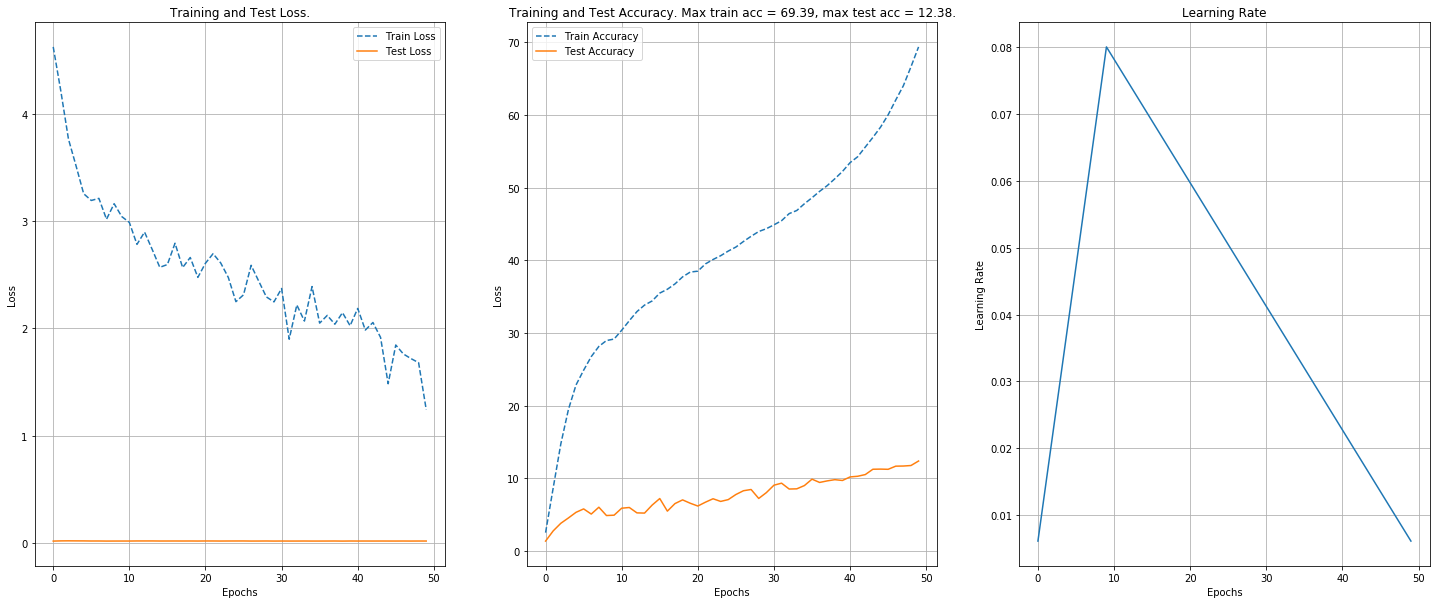

In [27]:
plotdata.PlotData.plottesttraingraph(train_losses=train_losses,train_acc=train_acc,test_losses=test_losses,
                                     test_acc=test_acc,lr_data=lr_data, plotonsamegraph=True,epochs=epoch,doProcessArray=False)

In [9]:
# plotdata.PlotData.plotlrrangetestgraph(lr_data,test_acc,train_acc,test_losses,train_losses)

In [10]:
import torch
import src.utils.utils as utils
import src.preprocessing.albumentationstransforms as preprocessing
preproc = preprocessing.AlbumentaionsTransforms()
import src.preprocessing.preprochelper as preprochelper
import glob
from PIL import Image
from src.utils.modelutils import *
import src.visualization.plotdata as plotdata
import src.dataset.dataset as dst
import src.dataset.dataloader as dl
import src.preprocessing.customcompose as customcompose
import src.train.train_model as train
import torch
from torch.utils.tensorboard import SummaryWriter
import torchvision
from src.visualization.tensorboard.tensorboardhelper import TensorboardHelper

%load_ext tensorboard

In [11]:
print(torch.cuda.is_available())
saved_data, epoch, model_state_dict, optimizer_state_dict, train_losses, train_acc, test_losses, test_acc\
            , test_losses, lr_data, class_correct, class_total\
= utils.Utils.loadmodel(path="savedmodels/finalmodelwithdata.pt")

True


In [12]:
model, device = utils.Utils.createA11CustomResnetModel(model_state_dict=model_state_dict)

cuda


In [13]:
train_transforms, test_transforms = preprochelper.PreprocHelper.getpytorchtransforms((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
ds = dst.Dataset()
train_dataset = ds.gettraindataset(train_transforms)
test_dataset = ds.gettestdataset(test_transforms)

batch_size = 512
dataloader = dl.Cifar10Dataloader(traindataset=train_dataset, testdataset=test_dataset,batch_size=batch_size)
test_loader = dataloader.gettestdataloader()
train_loader = dataloader.gettraindataloader()

# obtain one batch of test images
dataiterator = iter(test_loader)
# specify the image classes
classes = ds.getclassesinCIFAR10dataset()



Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True
512


In [14]:
classified, misclassified = train.TrainModel.getinferredimagesfromdataset(dataiterator=dataiterator, model=model,
                                                                          classes=classes, batch_size=batch_size,
                                                                          number=2)

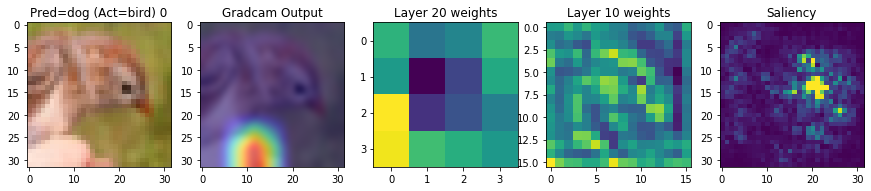

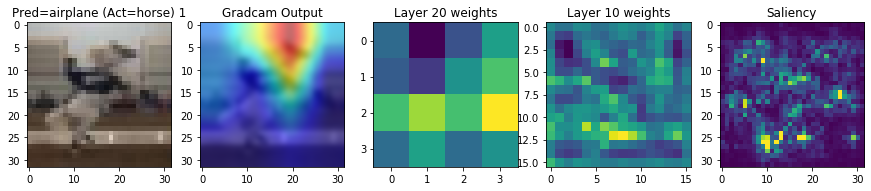

In [15]:
plotdata.PlotData.plotinferredimagesfromdataset(misclassified, model, device, classes,"misclassifed"
                                                ,size=(15,20),layerNo=20)

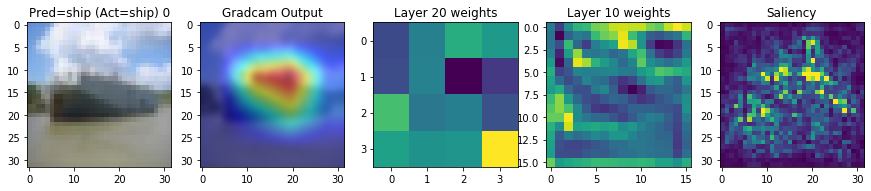

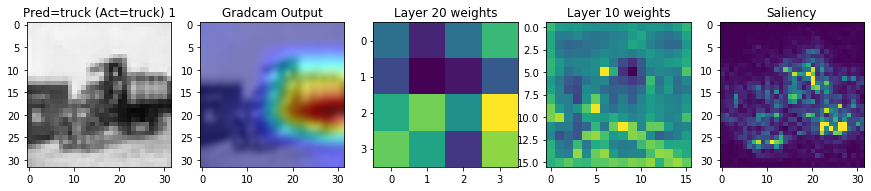

In [16]:
plotdata.PlotData.plotinferredimagesfromdataset(classified, model, device, classes,"correct"
                                                ,size=(15,20),layerNo=20)

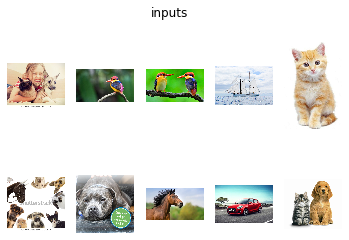

In [17]:
# from src.utils.modelutils import subplot
image_paths = glob.glob('./images/testimages/*.*')
images = list(map(lambda x: Image.open(x), image_paths))
subplot(images, title='inputs', nrows=2, ncols=5)

In [18]:
inputs = [torchvision.transforms.Compose([torchvision.transforms.Resize((32, 32)), torchvision.transforms.ToTensor(),
                                          torchvision.transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])(
    x).unsqueeze(0) for x in images]  # add 1 dim for batch
inputs = [i.to(device) for i in inputs]

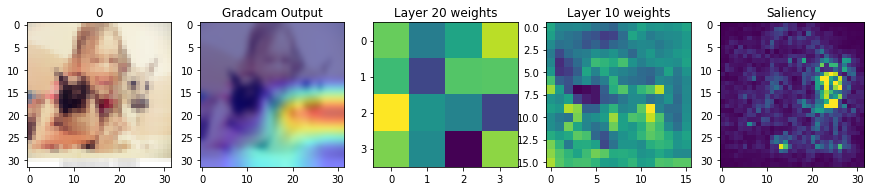

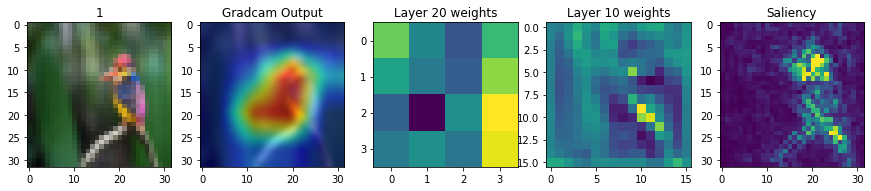

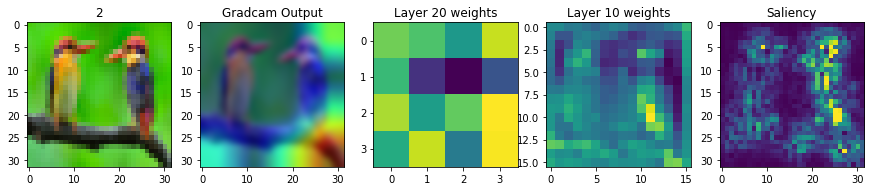

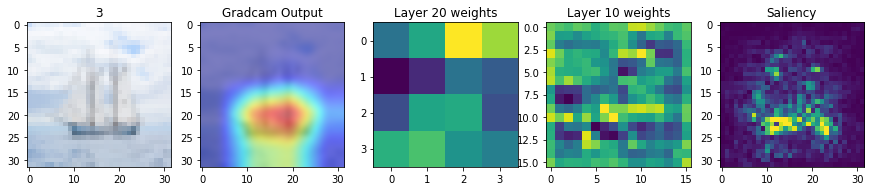

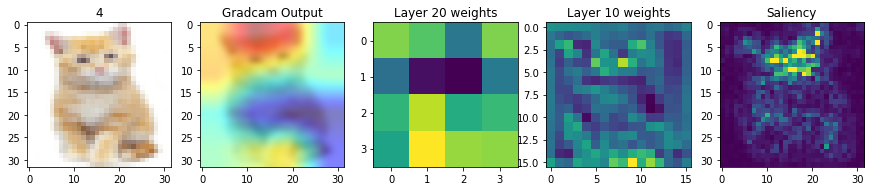

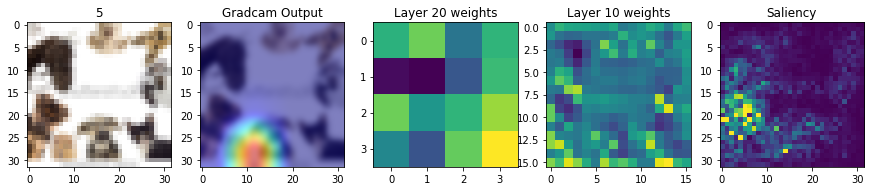

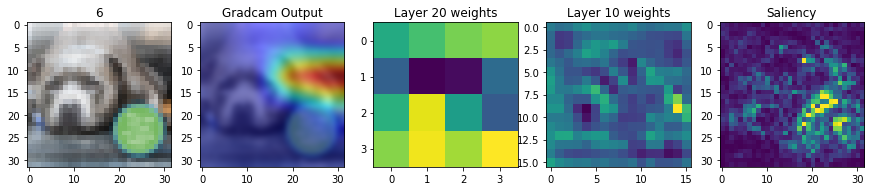

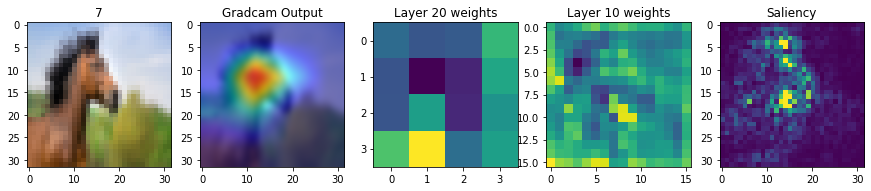

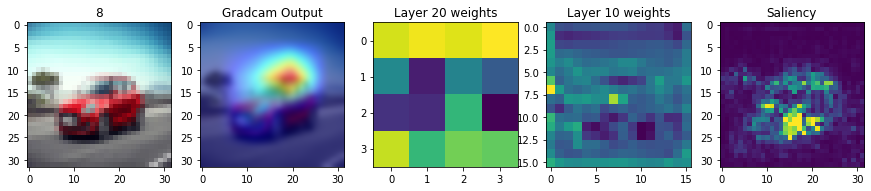

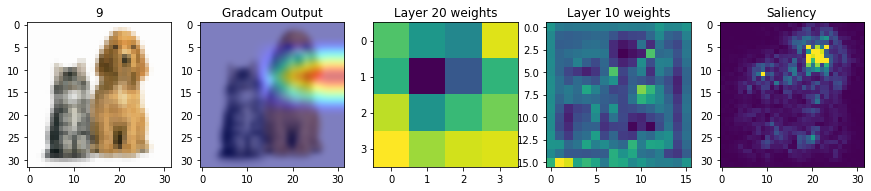

In [19]:
from src.visualization.gradcam.gradcam import GradCam
from src.visualization.gradcam import gradcamhelper

# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']


# print("Gradcam of external images for Layer 34, Conv2d, Output Shape = 8")
loc = 0
for input in inputs:  
    dict = {loc:input}
    plotdata.PlotData.plotinferredimagesfromdataset(dict, model, device, classes,"external"
                                                ,size=(15,20),layerNo=20)
    loc += 1


In [20]:
images, labels = next(iter(train_loader))

In [21]:
# model, device = utils.Utils.createmodelresnet18(model_state_dict=model_state_dict)
images, labels = images.to(device), labels.to(device)
grid = torchvision.utils.make_grid(images)

In [22]:
epochs = epoch

In [23]:
writer = SummaryWriter("customresnet_onecycle_A11")
writer.add_image('images', grid, 0)
writer.add_graph(model, images)

In [24]:
print(epochs)
for epoch in range(0, epochs):
    writer.add_scalars('Loss', {'Train': train_losses[epoch],'Test': test_losses[epoch],}, epoch+1)
    writer.add_scalars('Accuracy', {'Train': train_acc[epoch],'Test': test_acc[epoch],}, epoch+1)
    writer.add_scalar('LR', lr_data[epoch], epoch+1)
    writer.add_histogram('Test Accuracy distribution', test_acc[epoch], epoch+1)
    writer.add_histogram('Test Loss distribution', test_losses[epoch], epoch+1)
    writer.add_histogram('Train Accuracy distribution', train_acc[epoch], epoch+1)
    writer.add_histogram('Train Loss distribution', train_losses[epoch], epoch+1)
    
writer.close()

24


In [28]:
tensorboard --logdir=customresnet_onecycle_A11

In [32]:
# torch.cuda.empty_cache()

# test_dataset = None
# train_dataset = None
# test_loader = None
# train_loader = None

# import gc
# gc.collect()

43061

In [27]:
!kill 27460